In [1]:
! pip install --quiet gensim

^C
Operation cancelled by user
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE, MDS
from nltk.stem.snowball import SnowballStemmer
import spacy


stemmer = SnowballStemmer(language='english')
nlp = spacy.load('en', disable=['parser', 'ner'])


In [2]:
import pandas as pd
import re

yelps = pd.read_csv('sentiment/yelps.csv')

In [3]:
#shuffle data
yelps = yelps.sample(frac=1).reset_index(drop=True)

In [5]:
from bs4 import BeautifulSoup

def clean_yelp(s):
    s = BeautifulSoup(s, 'html5lib').get_text()
    s = ' '.join(s.split())
    s = s.strip().lower()
    return s

def tokenize(s):
    """ Returns a list of strings (tokens) from the document """
    
    token_pattern=r"(?u)\b\w\w+\b"
    
    tokens = re.findall(token_pattern,s)

    # Implement this function!
    # Hint: If you look at the sklearn source code on github, 
    # you will find a good regular expression they use as a default
    # tokenizer in CountVectorizer -- this is the tokenizer
    # we have been using until now!
    # But you need to implement your own now. 
    return tokens

In [6]:
# check tokenize function

In [7]:
check = 'I want to know if everything works find ! Even with és signs'

tokens_1 = tokenize(check)

In [8]:
#############################

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Create a count vectorizer, using the preprocessor and tokenizer from above
# use TruncatedSVD from Sklearn to generate a term embedding matrix for your data
# that is 100 dimensional in size.
# Embed your documents via that term embedding matrix (this is just the PCA of the 
# TF matrix, as returned by "transform" on TruncatedSVD

# Here you should have TWO vector representations of your Yelp data: 
# 1. The original TF matrix
CVect = CountVectorizer(preprocessor=clean_yelp, tokenizer=tokenize)
TF_matrix = CVect.fit_transform(yelps.text)

# 2. The first 100 components of the PCA of that matrix, as performed by TruncatedSVD

T100 = TruncatedSVD(n_components=100)
First100_matrix = T100.fit_transform(TF_matrix)

/home/gsitges/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/gsitges/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:336: UserWarning: "https://www.consumeraffairs.com/news/mypillow-gets-a-rude-awakening-as-the-better-business-bureau-gives-it-an-f-010517.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [10]:
from sklearn.metrics import accuracy_score

def test_holdout_vectors(V, y, cutoff):
    model = LogisticRegression()
    model.fit(V[:cutoff], y[:cutoff])
    preds = model.predict(V[cutoff:])
    return accuracy_score(preds, y[cutoff:])

In [11]:
# Test your vector representations using the above function, test_holdout_vectors. 
# for several levels of "cutoff". 

# This function simulates training on a small part of your data and testing on the rest.
# Thus, it's as though you have some labelled data but a bunch of unlabelled data. 
# This is essentially a semi-supervised situation. 

# Do the word embeddings generated via SVD allow you to pull information from the 
# unlabeled data and improve your score given a small training set? 
from sklearn.linear_model import LogisticRegression
parts = [100,500,1000,2500,10000,25000,50000,75000]

full_res = []
part_res = []

for p in parts:
    full_res.append(test_holdout_vectors(TF_matrix, yelps.positive, p))
    part_res.append(test_holdout_vectors(First100_matrix, yelps.positive, p))
    

/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [12]:
dif = list(set(full_res) - set(part_res))

In [13]:
import numpy as np
dif = np.asarray(full_res)- np.asarray(part_res)
 

As we increase the number of labeled data, full matrix perform better, but for more unsupervised problems, both perform similarly (if not truncated svd better)

In [14]:
from gensim.models import Word2Vec

# Next, create another term embedding via Word2Vec, also 100 dimensional
# Look at the documentation from the library gensim and see what hyperparameters
# you can choose to tune. 
# Note: training takes time, so you probably won't want to try too many!

# pass the cleaned and tokenized yelp reviews as "sentences" to your model
sentence = yelps.text.apply(clean_yelp).apply(tokenize)
# to build the vocabulary and train the word vectors. 

/home/gsitges/anaconda3/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
/home/gsitges/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/gsitges/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:336: UserWarning: "https://www.consumeraffairs.com/news/mypillow-gets-a-rude-awakening-as-the-better-business-bureau-gives-it-an-f-010517.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [15]:
W2V_1 = Word2Vec(sentence, window=2, min_count=5, workers=4)
#W2V_2 = Word2Vec(sentence, window=4, min_count=5, workers=4)

In [16]:
import numpy as np

def embed_w2v(tokens, w2v):
    idxs = [w2v.wv.vocab.get(t) for t in tokens]
    idxs = [t.index for t in idxs if t]
    N = w2v.wv.vectors.shape[1]
    if len(idxs) < 1:
        return np.zeros(N)
    a = np.sum(w2v.wv.vectors[idxs, :], axis=0)
    a /= np.linalg.norm(a)
    return a



# use as follows: np.array([embed_w2v(t, w2v) for t in X])

In [17]:
matrix_w2v_1 = np.array([embed_w2v(t, W2V_1) for t in sentence])
#matrix_w2v_2 = np.array([embed_w2v(t, W2V_1) for t in sentence])

In [18]:
w2v_res = []

for p in parts:
    w2v_res.append(test_holdout_vectors(matrix_w2v_1, yelps.positive, p))

/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [23]:
# use the embed_w2v function to embed your Yelp reviews using the new
# word2vec word embeddings. Each review will be a normalized sum of the
# words that it is made of. 
# See how this improves the scores in the classification task using
# test_holdout_vectors -- is word2vec better? At what training-set sizes does it help
# more? 
import matplotlib.pyplot as plt

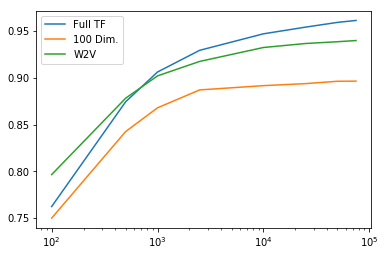

In [24]:
#plot accuracy
plt.plot(parts, full_res)
plt.plot(parts, part_res)
plt.plot(parts, w2v_res)
plt.legend(['Full TF', '100 Dim.', 'W2V'])
plt.xscale("log")

In [5]:
import pandas as pd
import re
from functools import reduce

pats = [re.compile(r'https?:\/\/[^\s]+'), 
        re.compile(r'rt\s*@\w+\s?:?'),
        re.compile(r'@\w+')]

def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    s = s.lower()
    _sub = lambda s,pat: re.sub(pat, '', s)
    s = reduce(_sub, pats, s)
    s = ' '.join(s.split()).strip()
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 
    
     #take out RT
    regex_RT = r'RT '
    s_wo_RT = re.sub(regex_RT,'',s)

    #take out URLS
    regex_URL = r'https\S+'
    s_wo_RT_URL = re.subn(regex_URL,'',s_wo_RT)[0]
    
    #take out mentions
    try: 
        regex_author = r'@\w+(=)?:'
        author = re.match(regex_author,s_wo_RT_URL).group()
    except:
        author = ''
        
    regex_mention = r'@\w+(:)?'
    s_no_person = re.sub(regex_mention,'',s_wo_RT_URL)
    
    #stemmer
    
    s_stemmer = stemmer.stem(s_no_person)
    
    #lemmatizing
    
    doc = nlp(s_stemmer)
    
    s_lemma = ' '.join([token.lemma_ for token in doc])
    
    #put author back
    s_author_message = author + s_lemma
    
    #put to left
    regex_initial_space = r'\s+'
    s_final = re.sub(regex_initial_space,'',s_author_message,1)
        

    return s_final

In [3]:
# Load tweet!
# NOTE: this file needs to be downloaded from Box! 

with open('tweets/tweets.txt') as f:
    tweets = pd.Series(f.readlines())

In [32]:
#part 1

# Now embed this twitter data, again using Word2Vec and LSA (SVD)
# you don't have any labels, but you might be able to 
# find some interesting phenomena.

#part 2

# Explore using either or both of the following tools: 
# 1. Word2Vec has a built in feature for getting most similar
# words, including via positive/negative examples (subtraction)
# What happens when you subtract "hillary" from "trump"? 
# 
# Bonus: build a similar feature for your LSA features and
# see if you can do similar vector math--> FALTA!!!!!!!!!!!!!!!!!!!!!!!!!!!

#part 3

# 2. Use the visualize_dist function to see how
# the tweet-tweet distance looks for a selection
# of random tweets. Do you agree with the distance? 
# Does one embedding seem better than another? 

In [41]:
#part 1
CVect_tw = CountVectorizer(preprocessor=clean_twitter)
TF_matrix_tw = CVect_tw.fit_transform(tweets)

T100_tw = TruncatedSVD(n_components=100)
First100_matrix_tw = T100_tw.fit_transform(TF_matrix_tw)

In [6]:
#part 2

#model fitting
sentence_tw = [clean_twitter(tw).split(' ') for tw in tweets]
W2V_tw = Word2Vec(sentence_tw, workers=4)

matrix_w2v_tw = np.array([embed_w2v(tw, W2V_tw) for tw in sentence_tw])
#model was previously saved 
#similar words

KeyboardInterrupt: 

In [7]:
from sklearn.externals import joblib
W2V_tw = joblib.load('W2V_tw.w2v')

/home/gsitges/anaconda3/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [9]:
W2V_tw.most_similar(positive=['trump'], negative=['hillary'], topn=10)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('j.', 0.4650901257991791),
 ('eiffel', 0.43645548820495605),
 ('tusk', 0.4320255517959595),
 ('j.trump', 0.4176994562149048),
 ('j', 0.40594595670700073),
 ('marysanchez', 0.40349507331848145),
 ('thetrump', 0.3911704123020172),
 ('vice', 0.3745018541812897),
 ('formermexican', 0.3716110587120056),
 ('french', 0.3402458429336548)]

In [10]:
W2V_tw.most_similar(positive=['trump'],  topn=10)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tecruz', 0.5838780403137207),
 ('donaldtrump', 0.5643729567527771),
 ('hillary', 0.5566611289978027),
 ('#trump', 0.5407875776290894),
 ('obama', 0.5339175462722778),
 ('gop', 0.5333586931228638),
 ('romney', 0.5332760810852051),
 ('dem', 0.5198040008544922),
 ('bernie', 0.5113853812217712),
 ('-PRON-', 0.5113811492919922)]

In [19]:
W2V_tw.most_similar(positive=['state'], negative=['hillary'],  topn=3)

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('emirate', 0.6151113510131836),
 ('kingdom', 0.600296139717102),
 ('-PRON-state', 0.5230201482772827)]

In [ ]:
from sklearn.externals import joblib


In [43]:
#part 3

In [44]:
from scipy.spatial.distance import pdist,squareform
import seaborn as sns

def visualize_dist(V, tweets, idxs):
    """ Visualize distances in heatmap

    V is the vector of embeddings 
    tweets is a list or series that converts from idx to tweet
    idxs is a list of integers that you would like to compare (<= 5 probably)
    """
    m = squareform(pdist(V[idxs], 'cosine'))
    _ = sns.heatmap(pd.DataFrame(m, columns = tweets[idxs], index= tweets[idxs]))

In [45]:
# take random numbers from tweet list

rdm = np.random.randint(0, high=len(tweets), size=10)

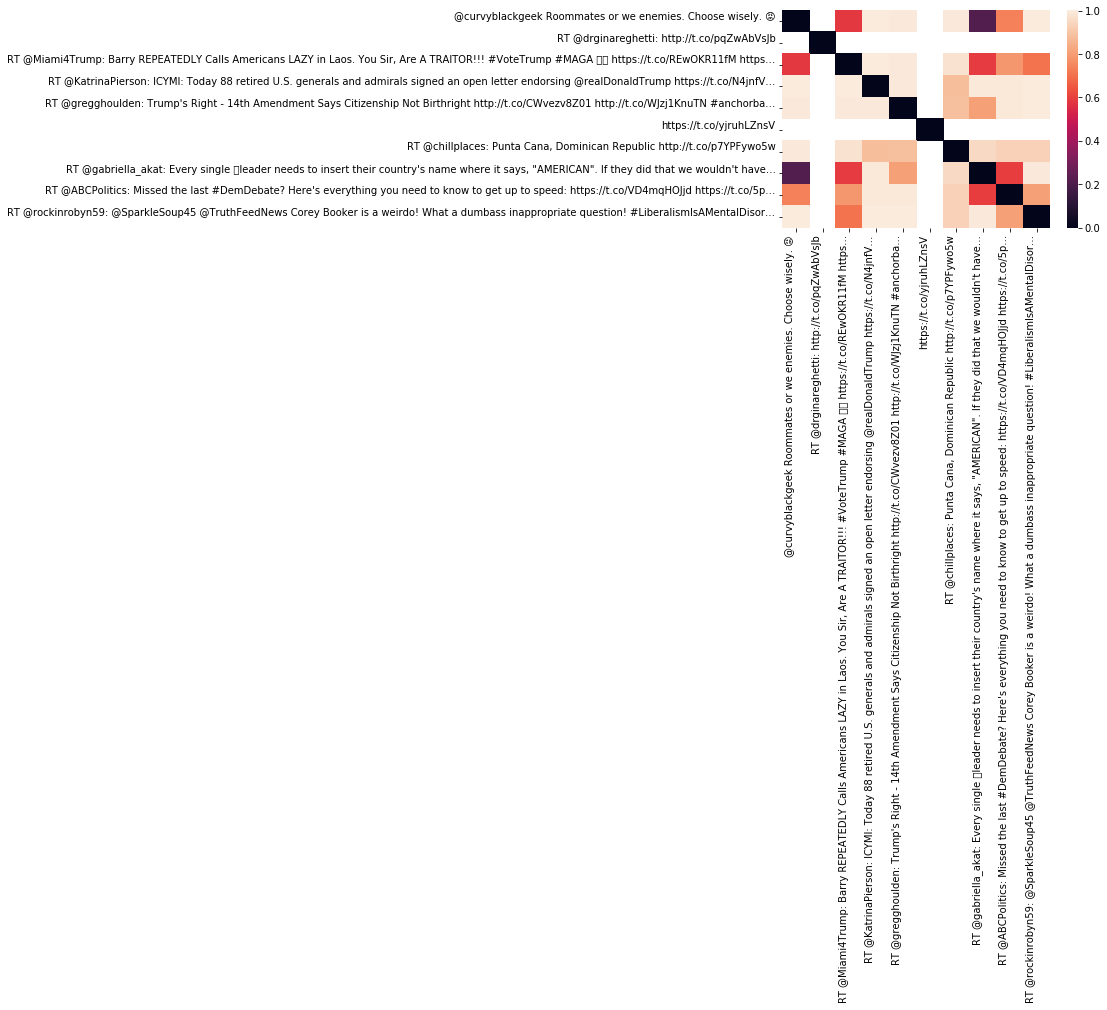

In [58]:
#using truncated svd model
visualize_dist(First100_matrix_tw, tweets, rdm)

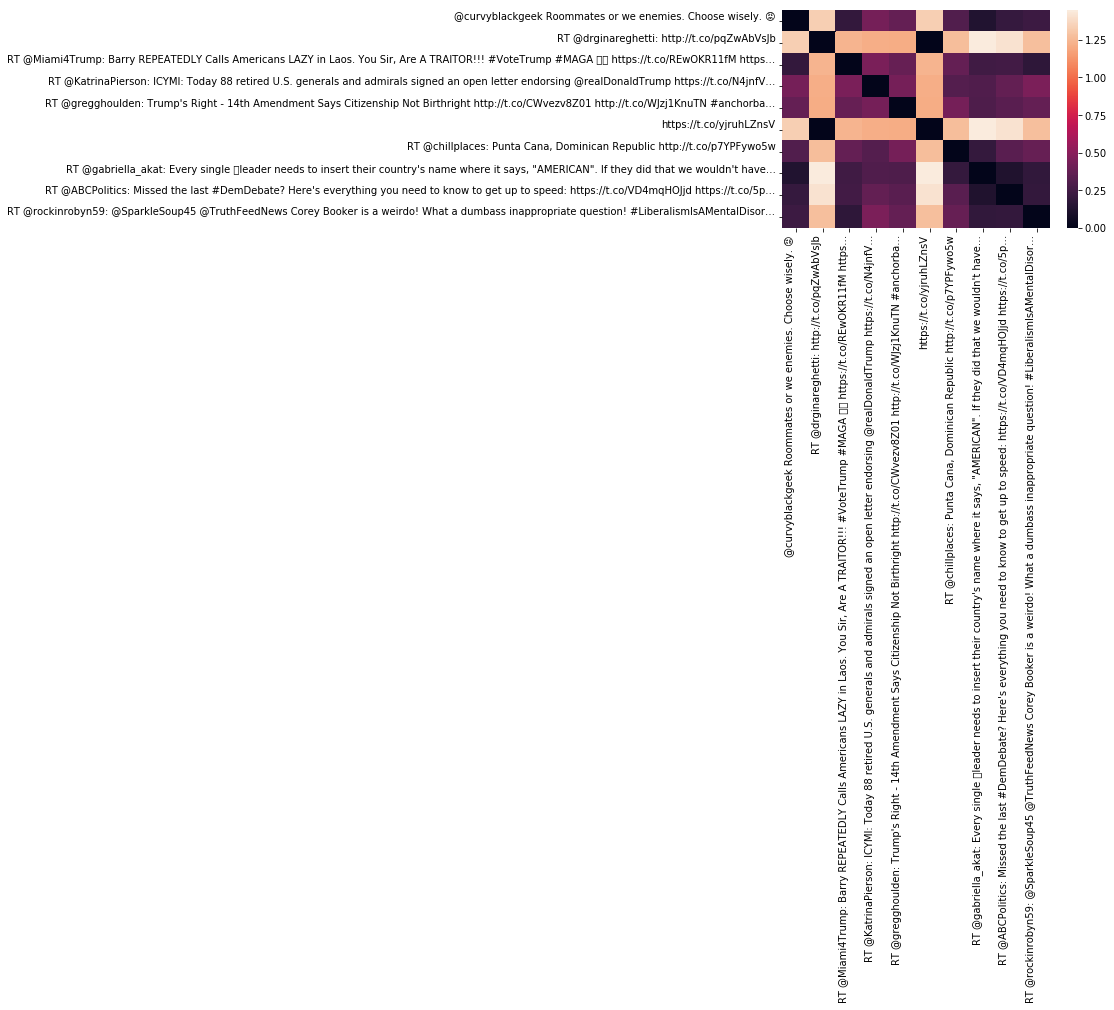

In [59]:
#using w2v model
visualize_dist(matrix_w2v_tw, tweets, rdm)

In [ ]:
# More bonus!
# Use one of the following pre-embedded models and see if your yelp scores improve? 
# What about your Twitter explorations?

# https://github.com/RaRe-Technologies/gensim-data

In [49]:
import gensim.downloader as api
wiki = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [50]:
#model for yelps

matrix_wiki_yelps = np.array([embed_w2v(sent, wiki) for sent in sentence])


/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [54]:
wiki_res = [test_holdout_vectors(matrix_wiki_yelps, yelps.positive, p) for p in parts]

/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

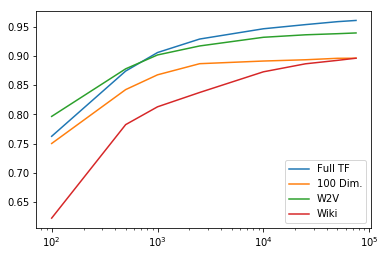

In [55]:
#compare to w2v, full and truncated
#plot accuracy
plt.plot(parts, full_res)
plt.plot(parts, part_res)
plt.plot(parts, w2v_res)
plt.plot(parts, wiki_res)
plt.legend(['Full TF', '100 Dim.', 'W2V','Wiki'])
plt.xscale("log")

In [56]:
#model for tweets

matrix_wiki_tw = np.array([embed_w2v(tw, wiki) for tw in sentence_tw])

/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/gsitges/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


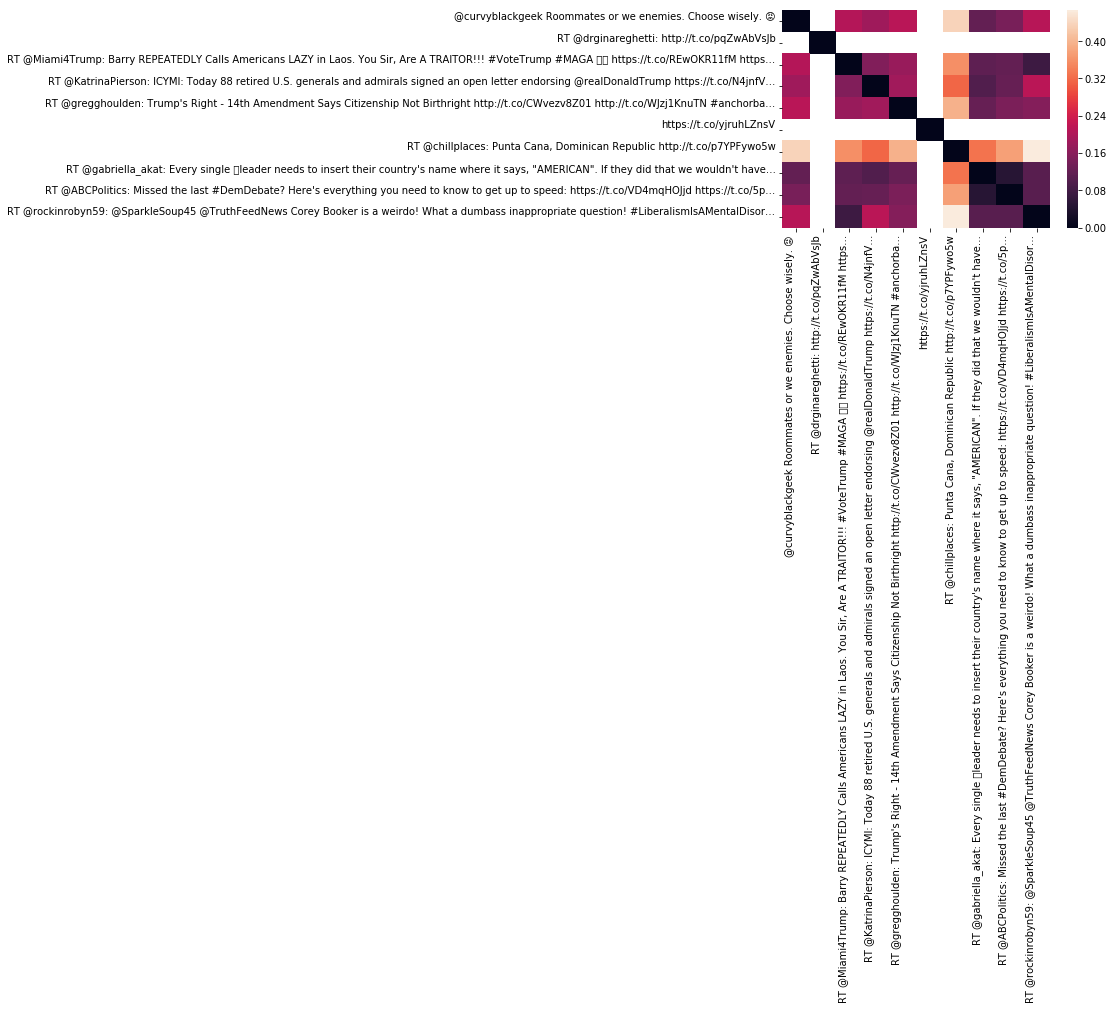

In [57]:
#heatmap similariry

visualize_dist(matrix_wiki_tw, tweets, rdm)

Wiki model appears not to work better than previous ones